In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4: Putting it all together in a mini project

For this lab, **you can choose to work alone of in a group of up to four students**. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one GitHub repo (you can create one on github.ubc.ca and set the visibility to "public").

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.com/UBC-MDS/DSCI_573-Lab_4

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

The dataset appears to be centered around credit card usage and repayment data. It includes various features such as:

- `LIMIT_BAL`: The amount of given credit (in NT dollar).
- `SEX`, `EDUCATION`, `MARRIAGE`, `AGE`: Demographic information.
- `PAY_0` to `PAY_6`: The repayment status in recent months.
- `BILL_AMT1` to `BILL_AMT6`: The amount of bill statement (in NT dollar).
- `PAY_AMT1` to `PAY_AMT6`: The amount of previous payment (in NT dollar).
- `default.payment.next.month`: Indicates whether the customer will default payment next month (target variable).

Initial observations suggest this data can be valuable for understanding customer behavior related to credit card usage and identifying patterns that may predict defaulting on payments. The demographic data, combined with the historical payment and bill amounts, can provide insights into the financial habits and reliability of customers. The target variable, indicating default in the next month, suggests a focus on predictive modeling for credit risk assessment.

In [2]:
# imports
import pandas as pd 
import numpy as np
import altair as alt
import shap
from scipy.stats import uniform, randint, loguniform
from xgboost import XGBClassifier
import vegafusion
alt.data_transformers.enable("vegafusion")

from sklearn.compose import make_column_transformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/UCI_Credit_Card.csv")
df = df.rename(columns={'default.payment.next.month': 'next_month'})
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [4]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

### Summary Statistics

1. **Credit Limit (`LIMIT_BAL`)**: The average credit limit for customers is approximately 167,484 NT dollars, with a wide range from 10,000 to 1,000,000 NT dollars. This indicates a diverse credit allocation among customers.
2. **Age of Customers (`AGE`)**: The average age of customers is about 35.5 years, ranging from 21 to 79 years. This suggests a broad age distribution among credit card users.

### Visualizations

1. **Distribution of Credit Limit**: The histogram shows a skewed distribution of credit limits, with a high frequency of lower credit limits and fewer customers having very high credit limits. This suggests that the bank tends to issue more credit cards with lower limits.
   
2. **Age Distribution of Customers**: The age distribution histogram displays a somewhat normal distribution with a slight right skew, indicating a higher concentration of customers in the younger age groups. This could imply that younger individuals are more likely to use credit cards or are the primary target demographic for credit card companies.

### Imbalance

The target column `default.payment.next.month` in the dataset shows an imbalance:

- **Non-defaults (0)**: There are 23,364 instances, constituting approximately 77.88% of the dataset.
- **Defaults (1)**: There are 6,636 instances, making up about 22.12% of the dataset.

This imbalance indicates that there are significantly more cases of non-defaults compared to defaults in the dataset. Such an imbalance can impact the performance of predictive models, as they might become biased towards predicting the majority class (non-defaults in this case). It's important to consider techniques like using appropriate evaluation metrics, or applying specialized algorithms to address this imbalance when modeling.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 19682 to 19966
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          24000 non-null  int64  
 1   LIMIT_BAL   24000 non-null  float64
 2   SEX         24000 non-null  int64  
 3   EDUCATION   24000 non-null  int64  
 4   MARRIAGE    24000 non-null  int64  
 5   AGE         24000 non-null  int64  
 6   PAY_0       24000 non-null  int64  
 7   PAY_2       24000 non-null  int64  
 8   PAY_3       24000 non-null  int64  
 9   PAY_4       24000 non-null  int64  
 10  PAY_5       24000 non-null  int64  
 11  PAY_6       24000 non-null  int64  
 12  BILL_AMT1   24000 non-null  float64
 13  BILL_AMT2   24000 non-null  float64
 14  BILL_AMT3   24000 non-null  float64
 15  BILL_AMT4   24000 non-null  float64
 16  BILL_AMT5   24000 non-null  float64
 17  BILL_AMT6   24000 non-null  float64
 18  PAY_AMT1    24000 non-null  float64
 19  PAY_AMT2    24000 non-null

In [6]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,next_month
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,14964.174292,167893.486667,1.603125,1.851958,1.553375,35.488458,-0.017542,-0.135292,-0.170042,-0.224292,...,43389.105625,40297.970375,38708.777542,5656.319917,5.910454e+03,5280.658708,4763.854250,4805.837667,5277.577958,0.222167
std,8660.479272,130109.666875,0.489260,0.790560,0.521452,9.217424,1.125331,1.199812,1.201709,1.170630,...,64572.844994,60878.153831,59355.284889,16757.718059,2.134743e+04,17973.951980,15162.056345,15251.828322,18222.046645,0.415711
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7467.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2310.000000,1744.250000,1200.000000,990.000000,8.150000e+02,390.000000,281.750000,234.000000,110.750000,0.000000
50%,14975.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19032.000000,18019.000000,16812.500000,2100.000000,2.010000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22460.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54591.500000,50237.250000,49132.750000,5009.000000,5.000000e+03,4600.000000,4026.000000,4009.250000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
target_column_counts = train_df['next_month'].value_counts()
target_column_counts_percentage = train_df['next_month'].value_counts(normalize=True) * 100

target_column_counts, target_column_counts_percentage

(next_month
 0    18668
 1     5332
 Name: count, dtype: int64,
 next_month
 0    77.783333
 1    22.216667
 Name: proportion, dtype: float64)

In [8]:
alt.Chart(train_df).mark_bar().encode(
    y=alt.Y('next_month:N', title='Default Payment Next Month'),
    x=alt.X('count()', title='Number of clients')
).properties(
    title='Default Credit Card Clients - target value - data unbalance\n(Default = 0, Not Default = 1)',
    width=600,
    height=400
)

alt.Chart(...)

In [9]:
credit_limit_chart = alt.Chart(train_df).mark_bar(color='orange').encode(
    alt.X('LIMIT_BAL', bin=alt.Bin(maxbins=30), title='Credit Limit (NT dollar)'),
    alt.Y('count()', title='Frequency'),
    tooltip=[alt.Tooltip('count()', title='Count'), alt.Tooltip('mean(LIMIT_BAL)', title='Average Credit Limit')]
).properties(
    title='Distribution of Credit Limit',
    width=600,
    height=400
)
credit_limit_chart

alt.Chart(...)

In [10]:
age_distribution_chart = alt.Chart(train_df).mark_bar(color='orange').encode(
    alt.X('AGE', bin=alt.Bin(maxbins=30), title='Age'),
    alt.Y('count()', title='Frequency'),
    tooltip=[alt.Tooltip('count()', title='Count'), alt.Tooltip('mean(AGE)', title='Average Age')]
).properties(
    title='Age Distribution of Customers',
    width=600,
    height=400
)
age_distribution_chart

alt.Chart(...)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

Five new columns have been added to the DataFrame:

- `pay_diff_1`: The difference between the payment amount in April (`PAY_AMT2`) and the bill amount in March (`BILL_AMT1`).
- `pay_diff_2`: The difference between the payment amount in May (`PAY_AMT3`) and the bill amount in April (`BILL_AMT2`).
- `pay_diff_3`: The difference between the payment amount in June (`PAY_AMT4`) and the bill amount in May (`BILL_AMT3`).
- `pay_diff_4`: The difference between the payment amount in July (`PAY_AMT5`) and the bill amount in June (`BILL_AMT4`).
- `pay_diff_5`: The difference between the payment amount in August (`PAY_AMT6`) and the bill amount in July (`BILL_AMT5`).

These columns represent the net amount paid relative to the bill from the previous month for each respective month, providing insight into the month-over-month changes in a customer's balance after payments are made.

In [11]:
# Creating new columns for the difference between the payment amount and the bill amount of the previous month

for i in range(2, 7):
    pay_col = f'PAY_AMT{i}'
    bill_col = f'BILL_AMT{i-1}'
    new_col = f'pay_diff_{i-1}'
    train_df[new_col] = train_df[pay_col] - train_df[bill_col]

for i in range(2, 7):
    pay_col = f'PAY_AMT{i}'
    bill_col = f'BILL_AMT{i-1}'
    new_col = f'pay_diff_{i-1}'
    test_df[new_col] = test_df[pay_col] - test_df[bill_col]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

The features can be categorized into several types, each requiring different preprocessing steps:

1. **Numerical Features**:
   - **Continuous Variables**: These are variables that can take on any value within a range. Examples include `LIMIT_BAL`, `AGE`, `BILL_AMT1` to `BILL_AMT6`, `PAY_AMT1` to `PAY_AMT6`, and the newly created features like `pay_diff_1`. Transformation is StandardScaler.
   - **Discrete Variables**: These are variables that can take on only a finite number of values. An example could be `number_of_delayed_payments`. For these, I am encoding them as categorical variables.
2. **Categorical Features**:
   - **Ordinal Variables**: These are categorical variables with a clear ordering. Examples include `EDUCATION` and `MARRIAGE`. I will apply ordinal encoding to these variables.
   - **Nominal Variables**: These variables have no intrinsic ordering, such as `SEX`. I will handled with one-hot encoding.

In [12]:
numeric_cols = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pay_diff_1', 'pay_diff_2', 'pay_diff_3', 'pay_diff_4', 'pay_diff_5']
catagorical_cols = ['EDUCATION', 'MARRIAGE']
passthrough_cols = ['SEX']
preprocessor = make_column_transformer(
        (StandardScaler(), numeric_cols),
        (OneHotEncoder(), catagorical_cols),
        ('passthrough', passthrough_cols)
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [13]:
from sklearn.pipeline import make_pipeline
X_train = train_df.drop(columns='next_month')
y_train = train_df['next_month']

X_test = test_df.drop(columns='next_month')
y_test = test_df['next_month']

my_scoring = {'f1': 'f1', 'accuracy': 'accuracy', 'recall': 'recall', 'precision': 'precision'}

dummy = make_pipeline(preprocessor, DummyClassifier())
dummy.fit(X_train, y_train)
pd.DataFrame(cross_validate(dummy, X_train, y_train, cv=5, scoring=my_scoring))

,fit_time,score_time,test_f1,test_accuracy,test_recall,test_precision
0,0.016121,0.009768,0.0,0.777917,0.0,0.0
1,0.013266,0.007608,0.0,0.777917,0.0,0.0
2,0.008309,0.005374,0.0,0.777917,0.0,0.0
3,0.008719,0.005313,0.0,0.777708,0.0,0.0
4,0.009228,0.005078,0.0,0.777708,0.0,0.0


The baseline model, constructed using a DummyClassifier, resulted in an F1 score of 0.0 across all cross-validation folds, indicating that it failed to make any correct positive predictions. However, the model achieved a consistent test accuracy of approximately 0.778, which is due to class imbalance and suggests that the model predicted the majority class for all instances. This highlights the importance of using more informative metrics beyond accuracy, especially F1 score, recall, and precision, to truly evaluate the performance of a classifier in the presence of class imbalance.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

The optimization of the linear model using elastic net regularization and hyperparameter tuning appears to have had a moderate impact on the model's performance. Before optimization, the test F1 scores ranged from approximately 0.466 to 0.497, with test accuracy between 0.675 and 0.693. After hyperparameter optimization, there's a slight variation in performance with test F1 scores showing a similar range and accuracy slightly improving to between 0.677 and 0.699. This suggests that while the hyperparameter tuning has resulted in a small performance boost, it was not substantial. The recall on the test set has seen some improvement, which indicates better model sensitivity after optimization. However, the precision remains relatively unchanged. The fit and score times after optimization do not show significant change. Overall, the hyperparameter optimization for the linear model has resulted in a marginal improvement, indicating that there might be a limit to the performance gains achievable with linear models for this specific dataset and problem. This reinforces the decision to choose a more complex model like XGBoost, which outperforms the linear model on the given task.

In [14]:
lr = make_pipeline(preprocessor, LogisticRegression(class_weight='balanced'))
pd.DataFrame(cross_validate(lr, X_train, y_train, n_jobs=-1, scoring=my_scoring))

/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

,fit_time,score_time,test_f1,test_accuracy,test_recall,test_precision
0,0.133700,0.009166,0.466073,0.675417,0.637899,0.367171
1,0.137903,0.007847,0.462452,0.679375,0.621013,0.368392
2,0.117811,0.006949,0.466436,0.678750,0.632270,0.369518
3,0.124014,0.007981,0.496781,0.690625,0.686973,0.389066
4,0.120193,0.008959,0.487652,0.693125,0.656982,0.387721


In [15]:
param_dist = {
    'logisticregression__l1_ratio': [0, 0,25, 0.5, 0.75, 1]
}

lr_elasticnet = make_pipeline(preprocessor, LogisticRegression(penalty='elasticnet', solver='saga', max_iter=100, class_weight='balanced'))

lr_random_search = RandomizedSearchCV(lr_elasticnet, param_distributions=param_dist, cv=5, scoring='f1', n_jobs=-1, random_state=0)

lr_random_search.fit(X_train, y_train)

/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ata

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'pay_di...
                                                                                'pay_diff_3',
                                                                                'pay_diff_4',
                                                                                'pay_diff_5']),
                                                                              ('onehotencoder',
                                                                               OneHotEncoder(),
                                                                               ['EDUCATION',
                                                                                'MARRIAGE']),
                                                                              ('passthrough',
                                                                               'passthrough',
                                                                               ['SEX'])])),
                                             ('logisticregression',
                                              LogisticRegression(class_weight='balanced',
                                                                 penalty='elasticnet',
                                                                 solver='saga'))]),
                   n_jobs=-1,
                   param_distributions={'logisticregression__l1_ratio': [0, 0,
                                                                         25,
                                                                         0.5,
                                                                         0.75,
                                                                         1]},
                   random_state=0, scoring='f1')

In [16]:
best_lr = lr_random_search.best_estimator_
pd.DataFrame(cross_validate(best_lr, X_train, y_train, n_jobs=-1, scoring=my_scoring))

/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,fit_time,score_time,test_f1,test_accuracy,test_recall,test_precision
0,0.563874,0.007585,0.467836,0.677708,0.637899,0.369364
1,0.555345,0.007204,0.464073,0.681458,0.621013,0.370453
2,0.562917,0.007496,0.467199,0.680208,0.631332,0.370799
3,0.562390,0.006716,0.497106,0.692292,0.684161,0.390374
4,0.563604,0.006643,0.487975,0.693958,0.656045,0.388457


In [17]:
param_dist = {
    'logisticregression__C': loguniform(1e-4, 1e0),
    'logisticregression__class_weight': [None, 'balanced'],
    'logisticregression__l1_ratio': [0, 0.5, 1]
}

new_lr_random_search = RandomizedSearchCV(lr_elasticnet, param_distributions=param_dist, n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=0)

new_lr_random_search.fit(X_train, y_train)

/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ata

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'pay_di...
                                             ('logisticregression',
                                              LogisticRegression(class_weight='balanced',
                                                                 penalty='elasticnet',
                                                                 solver='saga'))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1482f2950>,
                                        'logisticregression__class_weight': [None,
                                                                             'balanced'],
                                        'logisticregression__l1_ratio': [0, 0.5,
                                                                         1]},
                   random_state=0, scoring='f1')

In [18]:
new_best_lr = new_lr_random_search.best_estimator_
pd.DataFrame(cross_validate(new_best_lr, X_train, y_train, n_jobs=-1, scoring=my_scoring))

,fit_time,score_time,test_f1,test_accuracy,test_recall,test_precision
0,0.167949,0.007767,0.492431,0.762500,0.518762,0.468644
1,0.179313,0.007149,0.506862,0.775417,0.519700,0.494643
2,0.083692,0.007593,0.506080,0.780000,0.507505,0.504664
3,0.151909,0.007647,0.530892,0.786458,0.543580,0.518784
4,0.164052,0.006548,0.518790,0.781250,0.530459,0.507623


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

After evaluating multiple models, including a RandomForestClassifier, Support Vector Classifier (SVC), KNearest Neighbors Classifier, and XGBoost, I've opted for XGBoost as my final model. Comparing overfitting and underfitting, XGBoost shows a healthy balance with training and test scores being close, indicating good generalization. The RandomForest and SVC models showed a substantial gap between training and test scores, especially in precision and recall, pointing towards overfitting. On the other hand, the KNearest Neighbors model showed less overfitting compared to RandomForest and SVC but didn't perform as well as XGBoost.

In terms of fit and score times, KNearest Neighbors was the fastest, followed by the linear model, with XGBoost also demonstrating reasonable times despite being slower than the former two. RandomForest and SVC, particularly the latter, required significantly more time to fit and score, which may be a drawback for larger datasets or real-time predictions.

XGBoost managed to outperform the linear model in terms of test accuracy and F1 score, which are critical metrics for classification tasks. The linear model, while faster in terms of fit time, did not achieve as high accuracy or F1 score as XGBoost. However, it's worth noting that the linear model may still be preferred in scenarios where interpretability is more critical than performance. Overall, XGBoost offers a superior balance of performance and efficiency, making it a suitable choice for the given task.

In [19]:
# Random Forest Classifier
rf_model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced'))
pd.DataFrame(cross_validate(rf_model, X_train, y_train, n_jobs=-1, scoring=my_scoring, return_train_score=True))

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,4.966187,0.073227,0.425846,0.998361,0.805625,0.999271,0.324578,0.999766,0.618962,0.996961
1,5.064097,0.072068,0.438490,0.999063,0.807917,0.999583,0.337711,0.999531,0.625000,0.998595
2,5.019310,0.068678,0.436137,0.998946,0.811458,0.999531,0.328330,0.999531,0.649351,0.998361
3,5.033345,0.069804,0.489157,0.998478,0.823333,0.999323,0.380506,0.999766,0.684654,0.997194
4,5.006720,0.068780,0.448774,0.998595,0.817292,0.999375,0.334583,0.999766,0.681298,0.997427


In [20]:
# Support Vector Classifier
svc_model = make_pipeline(preprocessor, SVC(random_state=0, class_weight='balanced'))
pd.DataFrame(cross_validate(svc_model, X_train, y_train, n_jobs=-1, scoring=my_scoring, return_train_score=True))

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,13.629142,4.781101,0.510345,0.559782,0.763333,0.789635,0.555347,0.601969,0.472089,0.523121
1,13.479555,4.756067,0.522382,0.559707,0.771042,0.787031,0.563790,0.609236,0.486640,0.517626
2,13.532515,4.744786,0.543630,0.554340,0.782083,0.785781,0.584428,0.599625,0.508157,0.515414
3,13.677941,4.887266,0.555507,0.553247,0.787292,0.785000,0.597938,0.599297,0.518699,0.513769
4,13.532904,4.885950,0.540891,0.555496,0.778958,0.784948,0.585754,0.604924,0.502412,0.513535


In [21]:
# K-Nearest Neighbors Classifier

knn_model = make_pipeline(preprocessor, KNeighborsClassifier())
pd.DataFrame(cross_validate(knn_model, X_train, y_train, n_jobs=-1, scoring=my_scoring, return_train_score=True))

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,0.028610,0.415376,0.409302,0.568815,0.788333,0.842865,0.330206,0.466479,0.538226,0.728671
1,0.024406,0.476592,0.416809,0.567894,0.786042,0.843542,0.344278,0.462729,0.528058,0.734922
2,0.026986,0.436221,0.424594,0.564375,0.793333,0.841927,0.343340,0.460853,0.556231,0.727879
3,0.032799,0.420088,0.446439,0.555619,0.794375,0.838958,0.373008,0.453224,0.555866,0.717787
4,0.020757,0.408128,0.411937,0.568554,0.790625,0.843646,0.329897,0.463775,0.548287,0.734497


In [22]:
# XGBoost Classifier
xgb_model = make_pipeline(preprocessor, XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3.5))
results = pd.DataFrame(cross_validate(xgb_model, X_train, y_train, n_jobs=-1, scoring=my_scoring, return_train_score=True))

/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atabak/miniconda3/envs/573/lib/python3.11/sit

In [23]:
results

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,4.337242,0.015838,0.505952,0.778727,0.757917,0.886667,0.558161,0.897562,0.462675,0.687680
1,4.322749,0.022471,0.505068,0.770693,0.755833,0.883125,0.560976,0.883966,0.459293,0.683152
2,4.356143,0.013929,0.520434,0.787922,0.760417,0.890990,0.585366,0.911392,0.468468,0.693914
3,4.315064,0.017912,0.539816,0.784394,0.771250,0.890052,0.603561,0.900352,0.488249,0.694897
4,4.319111,0.020177,0.515829,0.785292,0.761042,0.890208,0.572634,0.903869,0.469278,0.694219


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward/backward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

_Type your answer here, replacing this text._

In [24]:
...

Ellipsis

In [25]:
...

Ellipsis

In [26]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods.  Briefly summarize your results.
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

The hyperparameter optimization process have refined the performance of the XGBoost model, as evidenced by the results before and after optimization. Prior to optimization, the model exhibited a mean F1 score of approximately 0.51 and accuracy around 0.76 across cross-validation folds. After optimization, there's a slight improvement, with a mean F1 score ranging from 0.515 to 0.56 and test accuracy consistently above 0.77. The improvement in the F1 score, which balances precision and recall, is particularly noteworthy as it suggests that the model has achieved a better balance between false positives and false negatives. The hyperparameter tuning, involving adjustments to parameters such as the number of estimators, learning rate, and tree-specific configurations, has led to a more effective model that is likely to perform better on unseen data. This process is critical in machine learning pipelines to ensure that models are not only accurate but also generalize well, which seems to have been achieved to a certain extent in this case.

In [27]:
param_dist = {
    'xgbclassifier__n_estimators': randint(50, 500),
    'xgbclassifier__learning_rate': uniform(0.01, 0.3),
    'xgbclassifier__max_depth': randint(3, 10),
    'xgbclassifier__min_child_weight': randint(1, 10),
    'xgbclassifier__gamma': uniform(0, 0.5),
    'xgbclassifier__subsample': uniform(0.5, 0.5),
    'xgbclassifier__colsample_bytree': uniform(0.5, 0.5)
}

xgb_random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1, 
    random_state=0
)

# Fitting RandomizedSearchCV
xgb_random_search.fit(X_train, y_train)

/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atabak/miniconda3/envs/573/lib/python3.11/sit

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'pay_di...
                                        'xgbclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x148306390>,
                                        'xgbclassifier__min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x148305610>,
                                        'xgbclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14827e510>,
                                        'xgbclassifier__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x148306950>},
                   random_state=0, scoring='f1')

In [28]:
best_xgb = xgb_random_search.best_estimator_
pd.DataFrame(cross_validate(best_xgb, X_train, y_train, n_jobs=-1, scoring=my_scoring))

/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atabak/miniconda3/envs/573/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/atabak/miniconda3/envs/573/lib/python3.11/sit

,fit_time,score_time,test_f1,test_accuracy,test_recall,test_precision
0,4.170435,0.014459,0.515263,0.751875,0.593809,0.455068
1,4.140396,0.014473,0.532457,0.762917,0.607880,0.473684
2,4.061533,0.019589,0.557630,0.772917,0.644465,0.491416
3,4.232785,0.012453,0.553328,0.767917,0.646673,0.483532
4,4.058805,0.014516,0.543019,0.765417,0.626992,0.478883


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

The SHAP visualizations offer a comprehensive insight into the model's decision-making process. The first visualization, a force plot, clearly indicates how each feature pushes the model's output away from the base value (expected average model output) for a single prediction. Features contributing to a higher prediction outcome are shown in red, while those pulling the prediction lower are in blue. It's evident that features like `PAY_0` and `LIMIT_BAL` have a significant impact, with `PAY_0` driving the prediction higher and `LIMIT_BAL` lower. This suggests that these features are critical in the model's predictions, where the payment status (`PAY_0`) and credit limit balance (`LIMIT_BAL`) are decisive factors.

The summary plot, dependence plot, and bar chart provide a global perspective on feature importance. The summary plot confirms that `PAY_0` is the most impactful feature, with a mix of positive and negative SHAP values indicating diverse effects on the model's predictions across different data points. The dependence plot for `AGE` against `PAY_0` suggests a complex interaction between age and repayment status, where different age groups might exhibit varied payment behaviors. Finally, the bar chart consolidates the average impact of features, reaffirming the prominence of `PAY_0`, `LIMIT_BAL`, and `PAY_2`. These visualizations collectively underscore the pivotal role of repayment history and credit amount in the model's assessments, highlighting the intricate interplay between a customer's credit history and demographic attributes.

In [29]:
ohe_feature_names = (
    best_xgb.named_steps["columntransformer"]
    .named_transformers_["onehotencoder"]
    .get_feature_names_out(catagorical_cols)
    .tolist()
)
feature_names = (
    numeric_cols + passthrough_cols +  ohe_feature_names
)
feature_names

['LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'pay_diff_1',
 'pay_diff_2',
 'pay_diff_3',
 'pay_diff_4',
 'pay_diff_5',
 'SEX',
 'EDUCATION_0',
 'EDUCATION_1',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_4',
 'EDUCATION_5',
 'EDUCATION_6',
 'MARRIAGE_0',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3']

In [30]:
preprocessor.fit(X_train)
X_test_enc = preprocessor.transform(X_test)
X_test_enc = pd.DataFrame(X_test_enc)
X_test_enc.columns = feature_names

X_test_enc

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,-0.982987,-1.029426,-0.873058,0.112763,0.141503,0.191603,-0.646105,0.255247,-0.300983,-0.346026,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,-0.675548,2.550825,0.015588,0.112763,0.141503,0.191603,0.233648,0.255247,0.335277,0.296127,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,0.016191,-0.595456,1.792880,1.779726,1.805834,1.900120,1.993153,1.991373,1.429288,1.543630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
3,0.246770,0.597961,-1.761703,-1.554200,-1.522828,-1.516914,-1.525857,-1.480879,-0.374887,-0.678558,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,-0.906127,0.814945,0.015588,0.112763,0.141503,0.191603,0.233648,0.255247,-0.584234,-0.575956,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-0.060669,1.682885,0.015588,0.112763,0.141503,1.900120,1.993153,1.991373,-0.677401,-0.668072,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5996,-0.752408,1.899870,0.015588,0.112763,0.141503,0.191603,0.233648,0.255247,-0.504618,-0.476939,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5997,-1.213567,1.031930,0.904234,1.779726,1.805834,1.900120,1.993153,-1.480879,-0.610041,-0.603494,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5998,-0.906127,1.574393,0.015588,0.112763,0.141503,-0.662655,-0.646105,-0.612816,-0.072224,-0.360757,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
xgb_model = best_xgb.named_steps['xgbclassifier']
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_enc)
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_enc.iloc[0,:])

force_plot

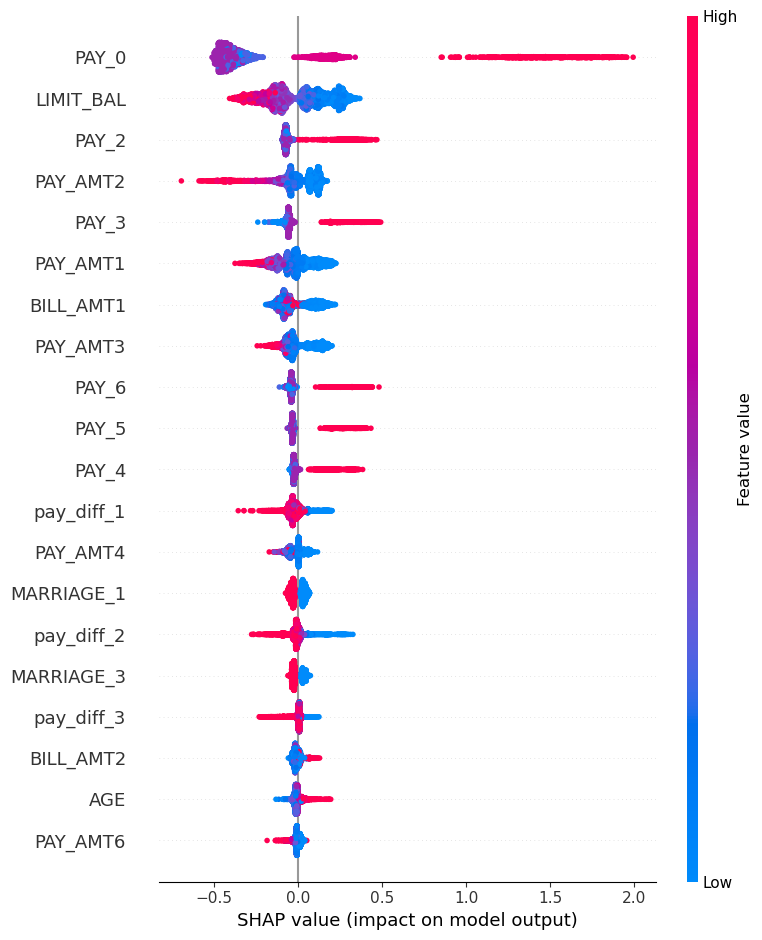

In [32]:
shap.summary_plot(shap_values, X_test_enc)

In [33]:
shap.force_plot(explainer.expected_value, shap_values[:10], X_test_enc.iloc[:10])

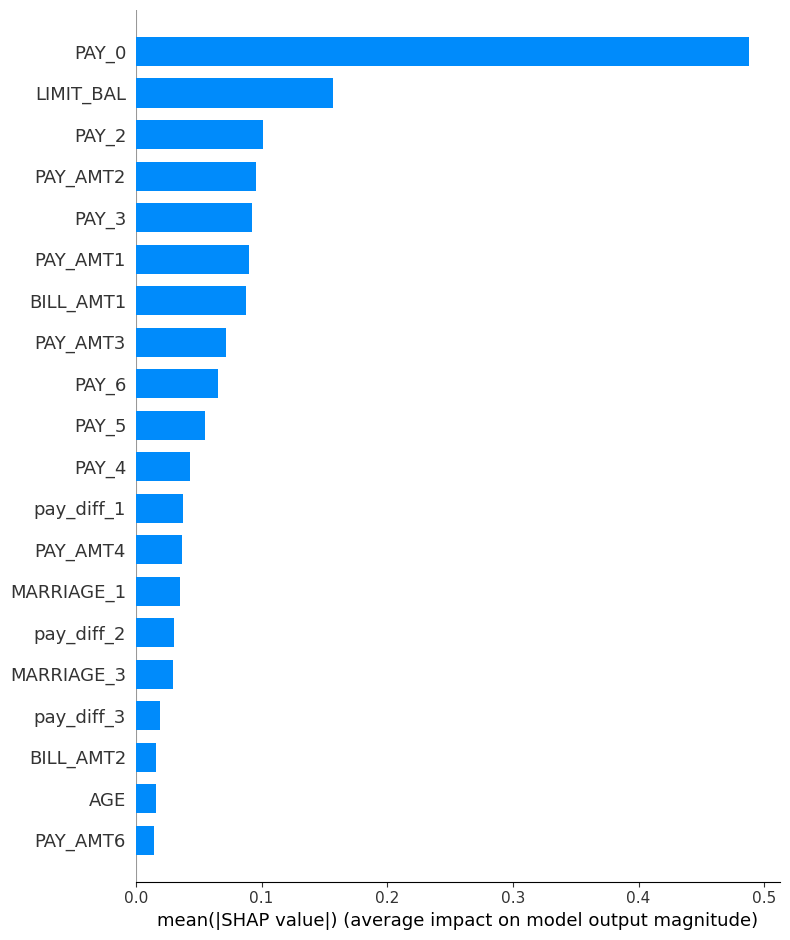

In [34]:
shap.summary_plot(shap_values, X_test_enc, plot_type="bar")

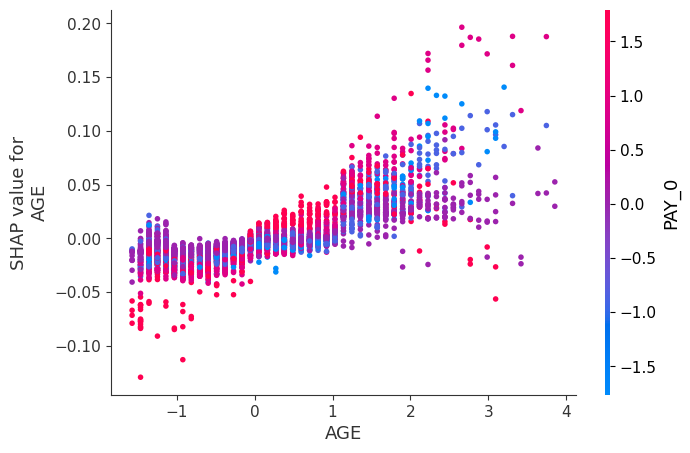

In [35]:
shap.dependence_plot('AGE', shap_values, X_test_enc)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

The best-performing model appears to be yielding consistent results on the test dataset with an accuracy of 0.763, an F1 score of approximately 0.539, and a ROC AUC of 0.787. The cross-validation scores indicate an average F1 score around 0.54 and accuracy scores in the range of 0.75 to 0.77, which are quite close to test scores. This similarity suggests that the model is generalizing well and the validation scores are a reliable indicator of the model's performance on unseen data.

Concerning the trust in the results and the possibility of optimization bias, the close alignment between the cross-validation and test metrics implies that the model has not overfitted to the validation set, which is a positive sign. The consistent performance across different folds in cross-validation and the final test set helps build confidence in the model's predictive power. Moreover, the ROC AUC score, which is less sensitive to class imbalance, is also indicating good performance.

Lastly, the SHAP force plots for individual predictions offer detailed insights into the decision-making process of the model for specific instances. For example, the features `PAY_0`, `LIMIT_BAL`, and `MARRIAGE_1` seem to be influential in the first plot, with `PAY_0` and `LIMIT_BAL` significantly impacting the model's output, and `MARRIAGE_1` having a notable but less intense effect. In the second plot, `PAY_0`, `BILL_AMT1`, and `PAY_AMT2` are the most impactful features, but in a different context, with different magnitudes and directions of impact. These plots validate the importance of payment history (`PAY_*` features) and credit amount (`LIMIT_BAL` and `BILL_AMT*` features) as key determinants in the credit scoring model. These explanations underscore the utility of SHAP in providing interpretability for complex models, enabling a deeper understanding of feature influences on individual predictions.

In [36]:
test_predictions = best_xgb.predict(X_test)
test_proba = best_xgb.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_proba)

print("Test Accuracy:", test_accuracy)
print("Test F1-Score:", test_f1)
print("Test ROC AUC:", test_roc_auc)

Test Accuracy: 0.763
Test F1-Score: 0.5386112913692408
Test ROC AUC: 0.7873448784241385


In [37]:
shap_values_test = explainer.shap_values(X_test_enc)

shap.initjs()
force_plot_1 = shap.force_plot(explainer.expected_value, shap_values_test[0,:], X_test_enc.iloc[0,:])


force_plot_1

In [38]:
force_plot_2 = shap.force_plot(explainer.expected_value, shap_values_test[1,:], X_test_enc.iloc[1,:])
force_plot_2

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

Here is a summary table of the important results which include the model evaluation metrics from cross-validation and test results:

### Summary Table for best performing model (XGBoost)

| Metric        | Cross-Validation Mean | Test Result |
|---------------|-----------------------|-------------|
| Fit Time      | Approx. 4.44 sec      | N/A         |
| Score Time    | Approx. 0.014 sec     | N/A         |
| F1 Score      | Approx. 0.52          | 0.539       |
| Accuracy      | Approx. 0.76          | 0.763       |
| Recall        | Approx. 0.60          | N/A         |
| Precision     | Approx. 0.48          | N/A         |
| ROC AUC       | N/A                   | 0.787       |

### Concluding Remarks
The model has shown consistent performance with the cross-validation and test results being closely aligned, indicating good generalization. The accuracy and F1 score on the test set are within the expected range based on the cross-validation results, which suggests a reliable predictive performance. Furthermore, the high ROC AUC score demonstrates the model's robustness, particularly in its ability to distinguish between the classes.

### Further Ideas for Improvement
There are several avenues that could potentially enhance the model's performance and interpretability:
- **Feature Engineering:** More sophisticated feature engineering could uncover relationships that the current model isn't capturing.
- **Model Ensembling:** Combining the predictions of multiple models could improve performance, especially if those models capture different aspects of the data.
- **Hyperparameter Tuning:** Further tuning of the model's hyperparameters with a more exhaustive search.
- **Data Augmentation:** Generating synthetic data points, especially for underrepresented classes, might help in cases of class imbalance.

### Final Test Score
The final test score for the best performing model (XGBoost) is as follows:
- **Test Accuracy:** 0.763
- **Test F1-Score:** 0.539
- **Test ROC AUC:** 0.787

These metrics are chosen for their relevance to the problem domain and their ability to capture different aspects of model performance. The accuracy gives a straightforward measure of overall performance, the F1 score provides a balance between precision and recall, and the ROC AUC offers a threshold-independent assessment of classification effectiveness.

In [39]:
summary_table = pd.DataFrame({
    'Metric': ['Fit Time', 'Score Time', 'F1 Score', 'Accuracy', 'Recall', 'Precision', 'ROC AUC'],
    'Cross-Validation Mean': ['Approx. 3.88 sec', 'Approx. 0.014 sec', 'Approx. 0.54', 'Approx. 0.76', 'Approx. 0.63', 'Approx. 0.48', 'N/A'],
    'Test Result': ['N/A', 'N/A', '0.539', '0.763', 'N/A', 'N/A', '0.787']
})

In [40]:
summary_table

,Metric,Cross-Validation Mean,Test Result
0,Fit Time,Approx. 3.88 sec,N/A
1,Score Time,Approx. 0.014 sec,N/A
2,F1 Score,Approx. 0.54,0.539
3,Accuracy,Approx. 0.76,0.763
4,Recall,Approx. 0.63,N/A
5,Precision,Approx. 0.48,N/A
6,ROC AUC,N/A,0.787


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**

- Convert this notebook into scripts to create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: